In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


# Data 살펴보기

# 각 feature의 의미.

* id: 각 행의 고유한 ID입니다.
* loc: 해당 행의 소스 코드의 라인 수입니다.
* v(g): 해당 행의 코드에서 사용되는 변수의 수입니다.
* ev(g): 해당 행의 코드에서 사용되는 변수의 수 중에서 전역 변수의 수입니다.
* iv(g): 해당 행의 코드에서 사용되는 변수의 수 중에서 지역 변수의 수입니다.
* n: 해당 행의 코드에서 사용되는 연산자의 수입니다.
* v: 해당 행의 코드에서 사용되는 변수의 수입니다.
* l: 해당 행의 코드에서 사용되는 논리 연산자의 수입니다.
* d: 해당 행의 코드에서 사용되는 비교 연산자의 수입니다.
* i: 해당 행의 코드에서 사용되는 할당 연산자의 수입니다.
* e: 해당 행의 코드에서 사용되는 산술 연산자의 수입니다.
* b: 해당 행의 코드에서 사용되는 부정 연산자의 수입니다.
* t: 해당 행의 코드에서 사용되는 텍스트 연산자의 수입니다.
* lOCode: 해당 행의 코드의 라인 수 중에서 코드 라인의 수입니다.
* lOComment: 해당 행의 코드의 라인 수 중에서 주석 라인의 수입니다.
* lOBlank: 해당 행의 코드의 라인 수 중에서 공백 라인의 수입니다.
* locCodeAndComment: 해당 행의 코드의 라인 수 중에서 코드 및 주석 라인의 수입니다.
* uniq_Op: 해당 행의 코드에서 사용되는 고유한 연산자의 수입니다.
* uniq_Opnd: 해당 행의 코드에서 사용되는 고유한 피연산자의 수입니다.
* total_Op: 해당 행의 코드에서 사용되는 모든 연산자의 수입니다.
* total_Opnd: 해당 행의 코드에서 사용되는 모든 피연산자의 수입니다.
* branchCount: 해당 행의 코드에서 사용되는 분기문의 수입니다.
* defects: 해당 행의 소스 코드에 결함이 있는지 여부입니다.

In [2]:
# 데이터 다운로드

train_df = pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv')

In [3]:
train_df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
# 정답을 포함 23개의 column과 total 101763개의 data 존재.
# 모든 feature(정답을 제외한 column)에서 결측치 없음.
# 모든 feature의 dataype이 int64, float 64로 구성.
# 정답은 bool type.

# train_df.info()

In [5]:
train_df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [6]:
train_df.describe(include = ['bool'])

# train data 중 약 77프로가 결함있음.

,defects
count,101763
unique,2
top,False
freq,78699


In [7]:
tx_train = train_df.drop('defects', axis = 1)
ty_train = train_df['defects']
tx_test = test_df

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(tx_train, ty_train)
ty_pred = logreg.predict(tx_test) # 테스트데이터에 대한 예측 라벨 생성.
acc_log = round(logreg.score(tx_train, ty_train), 3)
acc_log

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.797

In [9]:
submission = pd.DataFrame({'id' : test_df['id'], 'defects' : ty_pred})

submission.describe(include = ['bool'])

# 선형회귀로 예측한 test data는 약 97프로가 결함 있음.

submission.to_csv('/kaggle/working/submission.csv', index = False)

In [10]:
coef_df = pd.DataFrame({'Feature' : train_df.drop('defects', axis = 1).columns,
                        'Coefficient' : logreg.coef_[0]})

coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,loc,0.011700
21,branchCount,0.002933
14,lOComment,0.002497
6,v,0.001751
15,lOBlank,0.000791
16,locCodeAndComment,0.000543
2,v(g),0.000273
11,b,0.000018
3,ev(g),0.000002
10,e,-0.000001


# 이상치 제거

<Axes: ylabel='loc'>

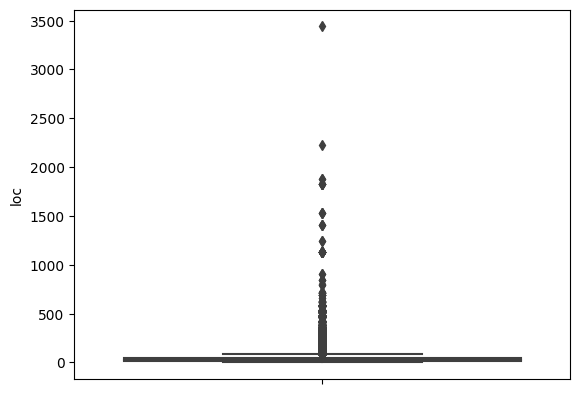

In [11]:
import seaborn as sns

sns.boxplot(y = 'loc', data = train_df)

In [12]:
# 이상치를 q3 와 q1을 기준으로 제거한다. q3보다 큰 이상치는 q3로 대체 q1보다 작은 이상치는 q1으로 대체 한다.

def outliear_remove(df):
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    
    for idx, d in enumerate(df):
        
        if d > q3 + (1.5 * iqr):
            df.loc[idx] = q3
            
        elif d < q1 - (1.5 * iqr):
            df.loc[idx] = q1
            
        else:
            continue
            
    return 

In [13]:
# q3와 q1을 기준으로 이상치가 얼마나 있는지 확인다.

def outliear_check(df):
    
    outliear_list = []
    
    for d in df:

        if m > q3 + (1.5 * iqr) or m < q1 - (1.5 * iqr):
            outliear_list.append(True)

        else:
            outliear_list.append(False)
            
    return sum(outliear_list)